In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("listingsEnglish2.csv")

In [ ]:
#df=df.drop(['Unnamed: 0'], axis=1)

## Cleaning the DataFrame to ensure values can become useful for analysis

In [5]:
df["location_list"]=df["location"].str.split(" in ")
df[["Type_of_Airbnb_Listing", "City"]] = pd.DataFrame(df.location_list.tolist(), index= df.index)
df["rating_list"]=df["rating"].str.split(" ")
df[["Reviews_Overall_Rating", "#_of_Reviews"]] = pd.DataFrame(df.rating_list.tolist(), index= df.index)
df["#_of_Reviews"]=df["#_of_Reviews"].str.extract('(\d+)')
df = df.drop(['location_list','rating_list'], axis=1)
df["price"]= df["price"].str.extract('(\d+)')

In [6]:
df.rename(columns = {'name':'Name_of_Listing', 'beds':'Beds_Available',
                              'price':'Price_in_USD'}, inplace = True)

In [7]:
df = df[['Name_of_Listing', 'City','Type_of_Airbnb_Listing','Beds_Available', 'Price_in_USD','Reviews_Overall_Rating','#_of_Reviews']]

In [8]:
df.head()

,Name_of_Listing,City,Type_of_Airbnb_Listing,Beds_Available,Price_in_USD,Reviews_Overall_Rating,#_of_Reviews
0,TKA 407: Fully Furnished Studio near Makati CBD,Makati,Private room,1 double bed,16,4.8,49
1,TKA 408: Fully Furnished Studio near Makati CBD,Makati,Apartment,1 double bed,16,4.76,45
2,Spectacular View at Gramercy 69th 1BR Penthouse!⭐,Makati,Apartment,1 bed,91,4.79,213
3,Backpackers Private Room @ Makati,Makati,Private room,1 single bed,10,4.94,16
4,Top Location! Makati Greenbelt Laureano Di Trevi,Makati,Apartment,1 queen bed,18,4.4,10


# Creating a DataFrame with UNIQUE Values as data is scraped from the Airbnb Manila Website

In [9]:
dfUNIQUE=df.drop_duplicates(subset = ["Name_of_Listing"])

In [10]:
len(dfUNIQUE)

254

In [ ]:
# Out of the 300 scraped listings, only 254 are unique

In [ ]:
# Getting the Unique Types of Airbnb Listings

In [11]:
dfUNIQUE.Type_of_Airbnb_Listing.value_counts()

Condo            169
Apartment         50
Private room      25
Loft               5
Hotel room         3
Home               1
Vacation home      1
Name: Type_of_Airbnb_Listing, dtype: int64

In [ ]:
# Inspecting the Unique Locations

In [ ]:
# Merging locations to include only official Metro Manila Cities

In [12]:
dfUNIQUE.City.value_counts()

Makati            138
Manila             35
Quezon City        27
Mandaluyong        20
Pasay              19
Taguig              8
Pasig               2
Paco                1
Malate              1
Pasay City          1
Lungsod Quezon      1
Parañaque           1
Name: City, dtype: int64

In [13]:
dfUNIQUE['City'].replace('Malate', 'Manila',inplace=True)
dfUNIQUE['City'].replace('Lungsod Quezon', 'Quezon City',inplace=True)

/var/folders/rn/0qdts8r966g7mfznjn7fnfg80000gn/T/ipykernel_12179/1111721857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUNIQUE['City'].replace('Paco', 'Manila',inplace=True)
/var/folders/rn/0qdts8r966g7mfznjn7fnfg80000gn/T/ipykernel_12179/1111721857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUNIQUE['City'].replace('Malate', 'Manila',inplace=True)
/var/folders/rn/0qdts8r966g7mfznjn7fnfg80000gn/T/ipykernel_12179/1111721857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [16]:
dfUNIQUE['City'].replace('Paco ', 'Manila',inplace=True)

/var/folders/rn/0qdts8r966g7mfznjn7fnfg80000gn/T/ipykernel_12179/3429033040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUNIQUE['City'].replace('Paco ', 'Manila',inplace=True)


In [17]:
dfUNIQUE.City.value_counts()

Makati         138
Manila          37
Quezon City     28
Mandaluyong     20
Pasay           19
Taguig           8
Pasig            2
Pasay City       1
Parañaque        1
Name: City, dtype: int64

## Creating Graphs to Analyze data from dfUNIQUE DataFrame

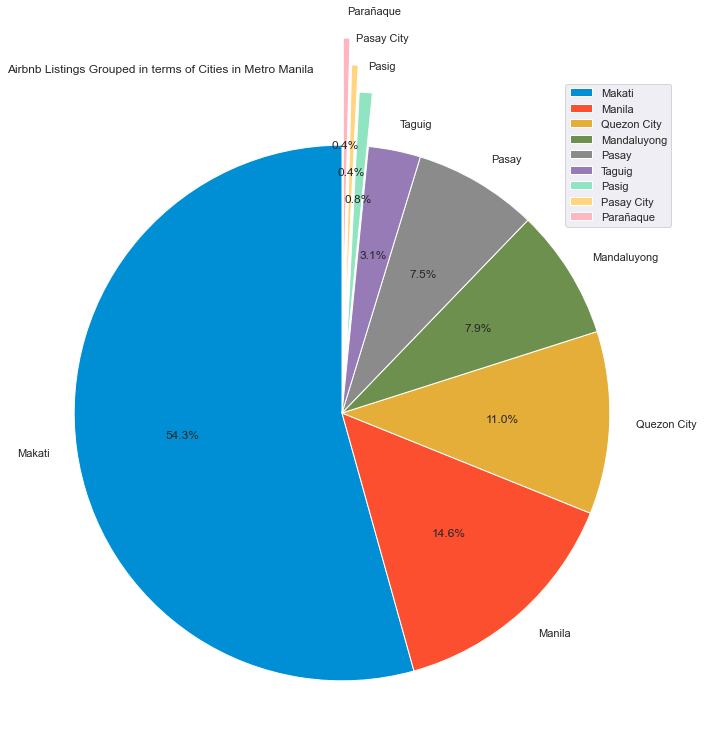

In [37]:
mylabels = dfUNIQUE.City.value_counts().index
mycolors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#967bb6','#90E4C1','#FFD580','#FFB6C1']
myexplode = [0, 0, 0, 0, 0, 0, 0.2, 0.3, 0.4]
shape = dfUNIQUE.City.value_counts().values
plt.figure(figsize=(12,40))
plt.pie(shape,labels=mylabels,colors=mycolors, autopct = '%1.1f%%', startangle=90, explode = myexplode)
plt.legend()
plt.title('Airbnb Listings Grouped in terms of Cities in Metro Manila', loc='left')
plt.show()

In [39]:
dfUNIQUE['Price_in_USD']=dfUNIQUE['Price_in_USD'].astype('int')
dfUNIQUE.Price_in_USD.describe()

/var/folders/rn/0qdts8r966g7mfznjn7fnfg80000gn/T/ipykernel_12179/2490179275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUNIQUE['Price_in_USD']=dfUNIQUE['Price_in_USD'].astype('int')


count    254.000000
mean      33.625984
std       18.530337
min       10.000000
25%       22.000000
50%       29.000000
75%       41.000000
max      153.000000
Name: Price_in_USD, dtype: float64

In [42]:
pricesIQR = dfUNIQUE[dfUNIQUE.Price_in_USD < 41]

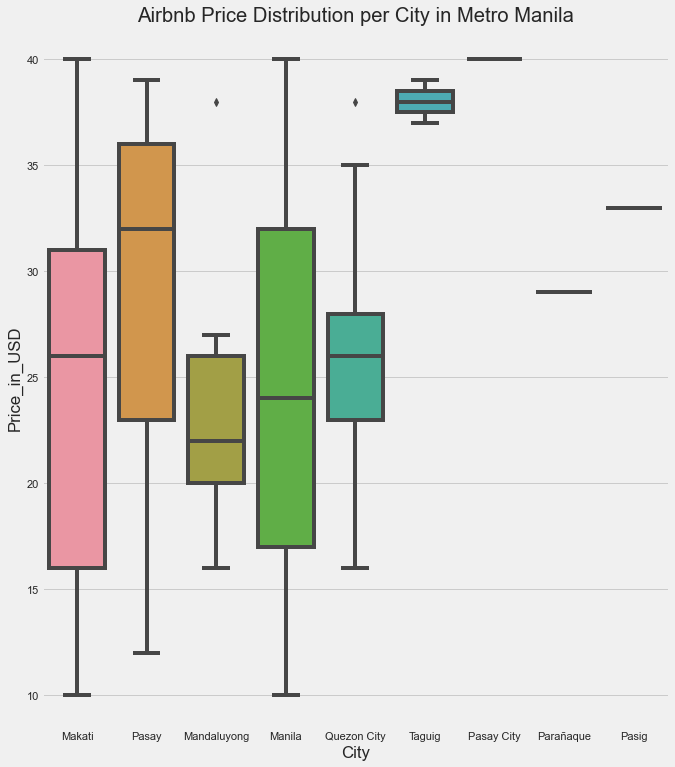

In [50]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,12))
sns.boxplot(y='Price_in_USD',x='City',data = pricesIQR)
plt.title('Airbnb Price Distribution per City in Metro Manila')
plt.show()

## Types of Airbnb Listings per City in Metro Manila

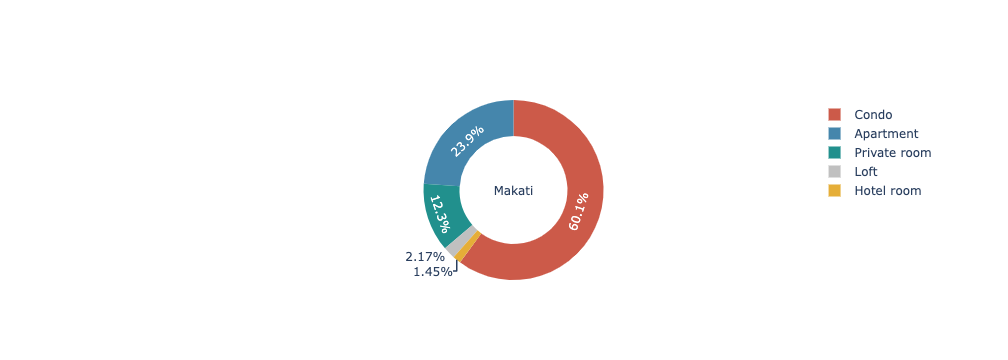

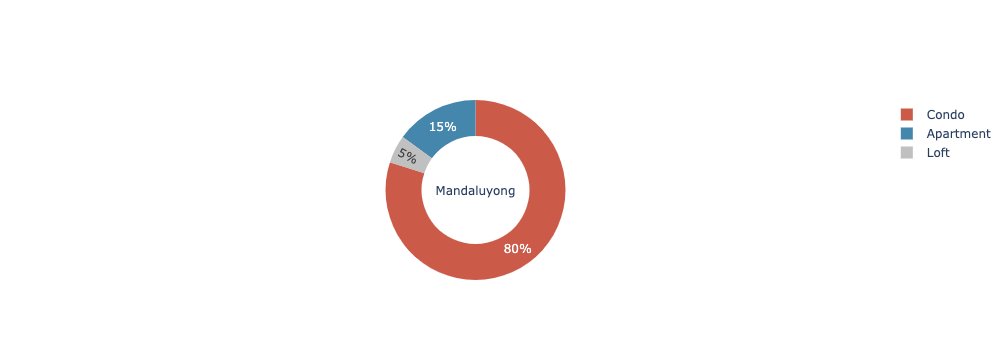

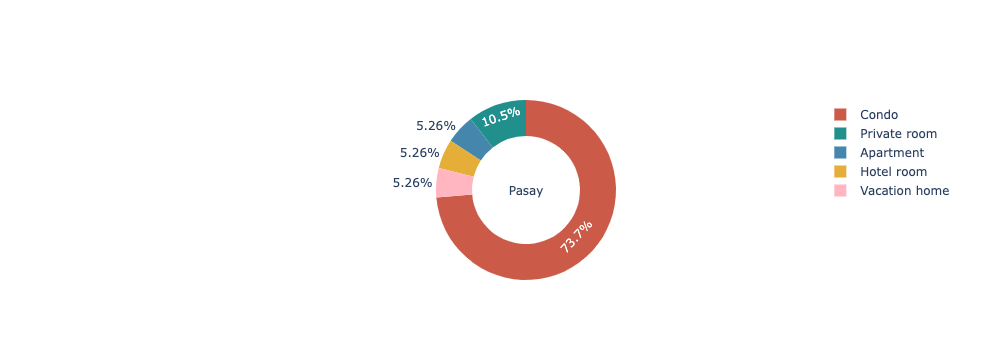

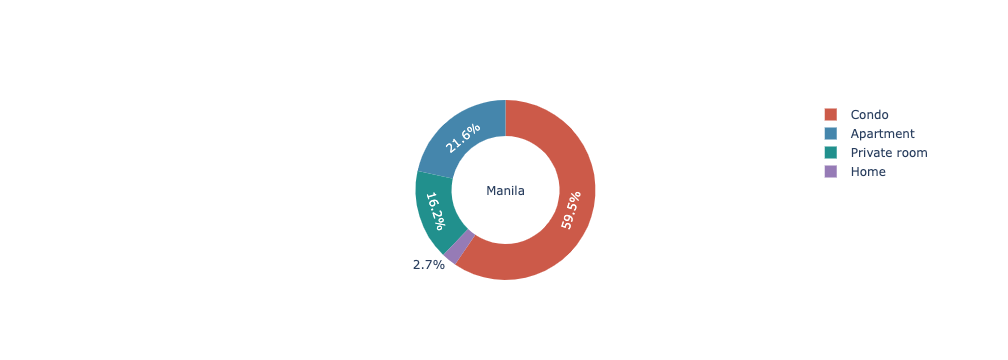

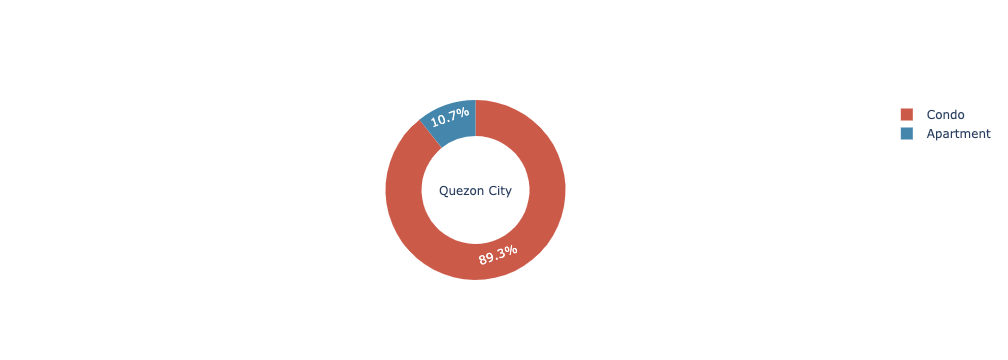

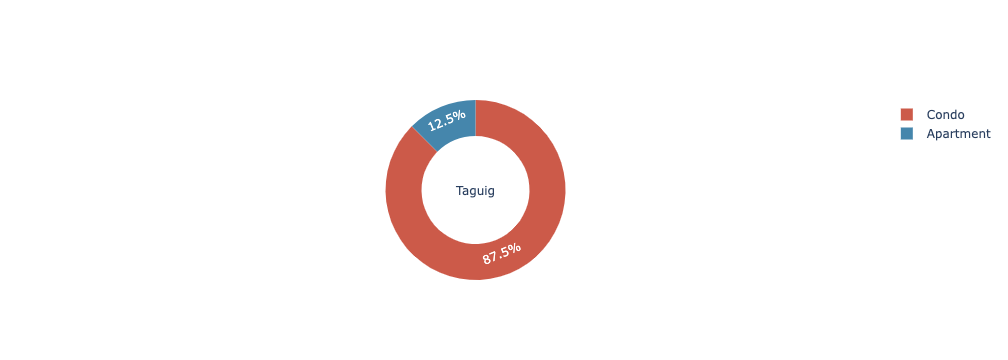

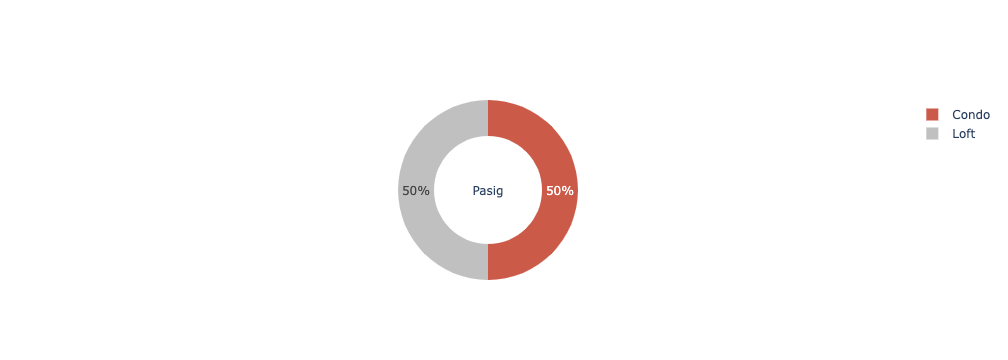

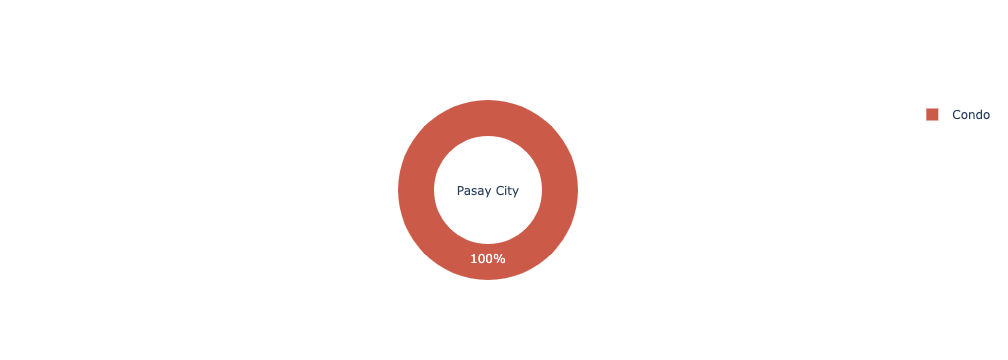

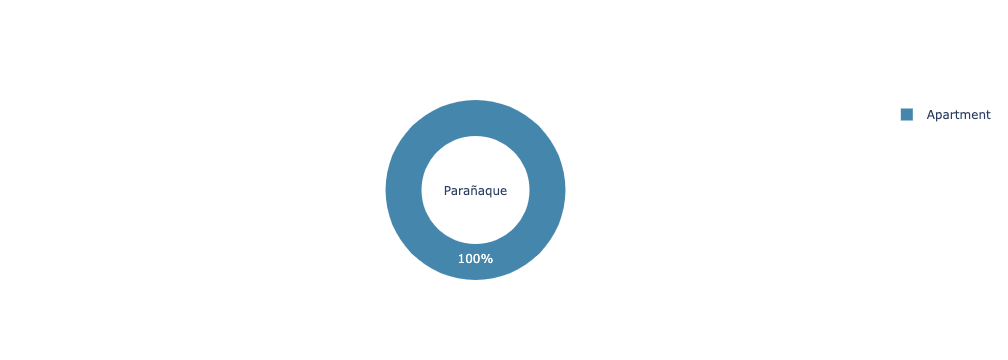

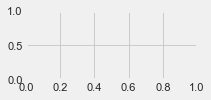

In [49]:
import plotly.offline as pyo
import plotly.graph_objs as go
color_dict = {'Condo': '#cc5a49', 'Apartment' : '#4586ac', 'Private room' : '#21908d', 'Loft' : '#C0C0C0','Hotel room' : '#e5ae38', 'Home' : '#967bb6', 'Vacation home' : '#FFB6C1' }
airbnb_types=dfUNIQUE.groupby(['City', 'Type_of_Airbnb_Listing']).size()
for city in dfUNIQUE.City.unique():
    
    airbnb_reg=airbnb_types[city]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = city, marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1

## Top Airbnb Listing Name Keywords

In [51]:
names=[]
for name in dfUNIQUE.Name_of_Listing:
    names.append(name)
def split_name(name):
    s = str(name).split()
    return s
names_count = []
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [52]:
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

[Text(0, 0, 'makati'),
 Text(1, 0, 'studio'),
 Text(2, 0, 'in'),
 Text(3, 0, 'near'),
 Text(4, 0, 'unit'),
 Text(5, 0, '&'),
 Text(6, 0, 'condo'),
 Text(7, 0, '1'),
 Text(8, 0, 'wifi'),
 Text(9, 0, 'cozy'),
 Text(10, 0, 'with'),
 Text(11, 0, 'w/'),
 Text(12, 0, 'furnished'),
 Text(13, 0, 'netflix'),
 Text(14, 0, 'view'),
 Text(15, 0, 'the'),
 Text(16, 0, 'of'),
 Text(17, 0, 'balcony'),
 Text(18, 0, 'br'),
 Text(19, 0, '1br'),
 Text(20, 0, '-'),
 Text(21, 0, 'manila'),
 Text(22, 0, 'for'),
 Text(23, 0, 'air'),
 Text(24, 0, '@')]

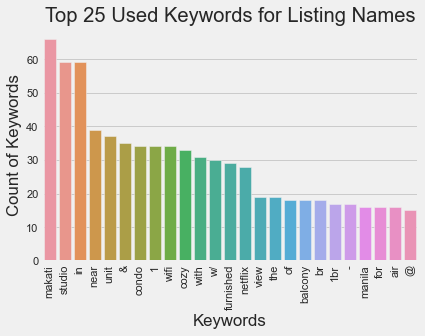

In [56]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 Used Keywords for Listing Names')
viz_count.set_ylabel('Count of Keywords')
viz_count.set_xlabel('Keywords')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

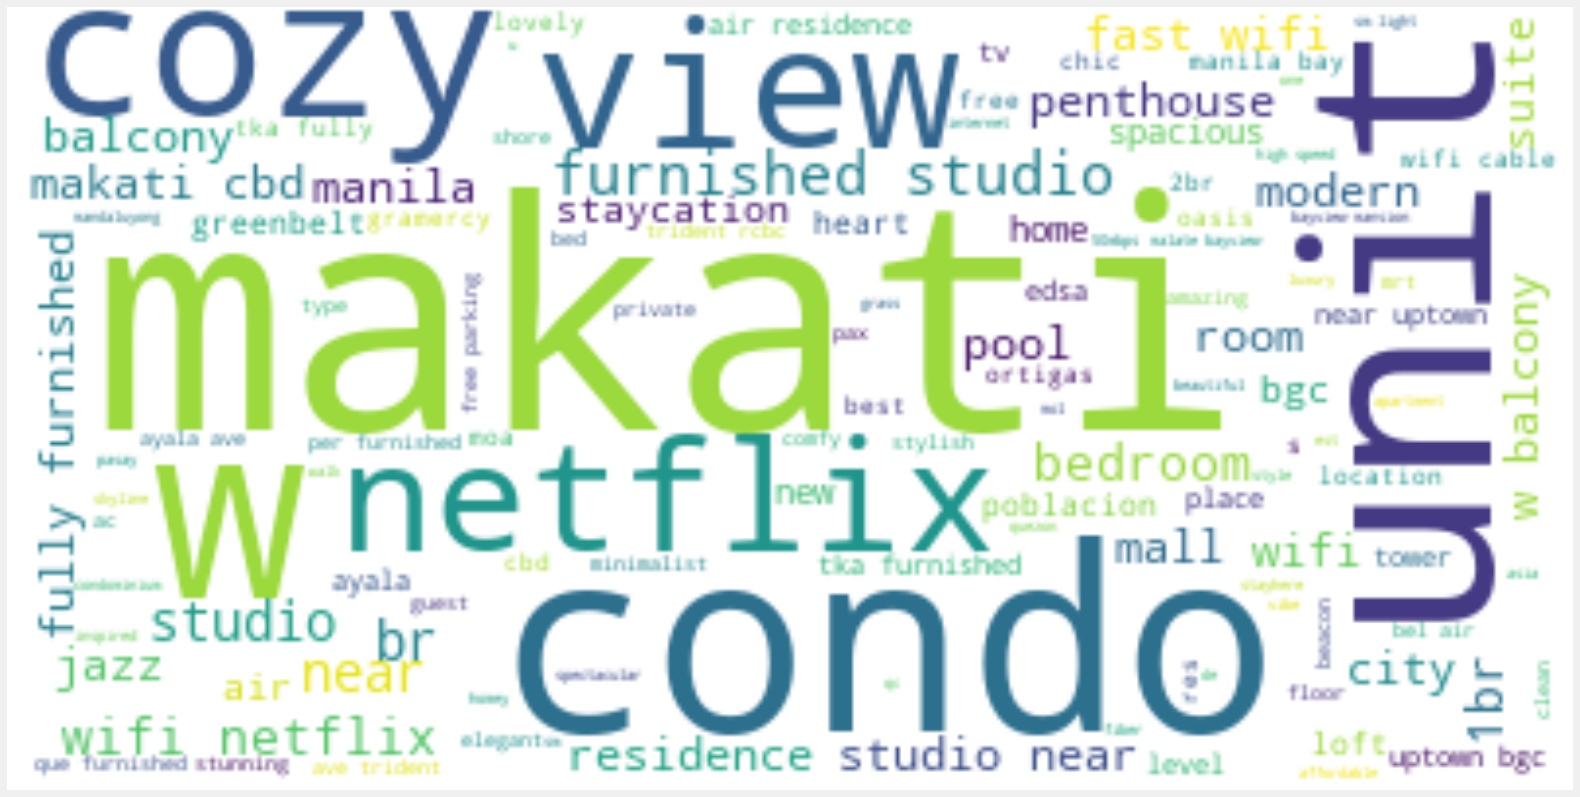

In [59]:
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in dfUNIQUE.Name_of_Listing)
wordcloud = WordCloud(max_words=200, background_color = 'white').generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Average Price of each Airbnb Listing Type

In [61]:
dfUNIQUE[['Type_of_Airbnb_Listing','Price_in_USD']].groupby('Type_of_Airbnb_Listing')\
  .agg(['mean','count'])\
    .sort_values(by=('Price_in_USD','mean'), ascending=False).round(2)

Price_in_USD      
                               mean count
Type_of_Airbnb_Listing                   
Loft                          53.80     5
Vacation home                 44.00     1
Condo                         36.69   169
Apartment                     30.58    50
Hotel room                    21.33     3
Private room                  16.96    25
Home                          11.00     1